In [2]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import CubicHermiteSpline as CHermite 
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Problema 1. Interpolar sin(x)

In [2]:
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)
df3 = lambda x: -np.cos(x)
df6 = lambda x: -np.sin(x)

x_num = [0, np.pi/2, np.pi]
y = f(x_num)
dy = df(x_num)

n= len(x_num)

In [3]:
#Error de lagrange
error_lagrange_P1 = lambda x: abs(1/factorial(n) * df3(x)*(x-x_num[0])*(x-x_num[1])*(x-x_num[2]))
error_hermite_P1 = lambda x: abs(df6(x)/factorial(2*n) * ((x-x_num[0])**2 *(x-x_num[1])**2 *(x-x_num[2])**2))

error_teorico = lambda yn, y: abs(yn - y)

In [4]:
print(n)

3


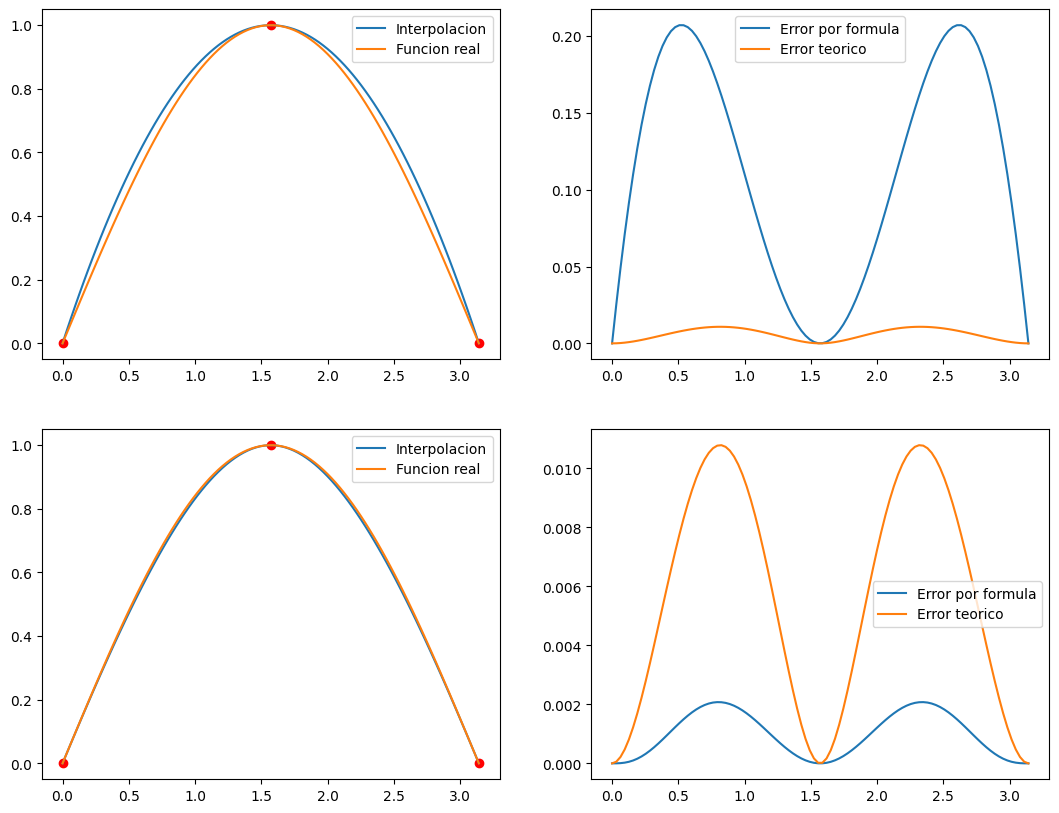

In [5]:
# Interpolacion de lagrange con error
lagrange_P1 = lagrange(x_num, y)
hermite_P1 = CHermite(x_num, y, dy)

x_interp_P1 = np.linspace(min(x_num), max(x_num), 100)
y_interp_LP1 = lagrange_P1(x_interp_P1)
y_interp_HP1 = hermite_P1(x_interp_P1)

y_error_LP1 = error_lagrange_P1(x_interp_P1)
y_error_TLP1 = error_teorico(f(x_interp_P1), y_interp_LP1)

y_error_HP1 = error_hermite_P1(x_interp_P1)
y_error_THP1 = error_teorico(f(x_interp_P1), y_interp_HP1)

fig, ax = plt.subplots(2, 2, figsize= (13, 10))

ax[0, 0].scatter(x_num, y, color= 'Red')
ax[0, 0].plot(x_interp_P1, y_interp_LP1, label= 'Interpolacion')
ax[0, 0].plot(x_interp_P1, f(x_interp_P1), label= 'Funcion real')
ax[0, 0].legend()

ax[0, 1].plot(x_interp_P1, y_error_LP1, label= 'Error por formula')
ax[0, 1].plot(x_interp_P1, y_error_THP1, label= 'Error teorico')
ax[0, 1].legend()

ax[1, 0].scatter(x_num, y, color= 'Red')
ax[1, 0].plot(x_interp_P1, y_interp_HP1, label= 'Interpolacion')
ax[1, 0].plot(x_interp_P1, f(x_interp_P1), label= 'Funcion real')
ax[1, 0].legend()

ax[1, 1].plot(x_interp_P1, y_error_HP1, label= 'Error por formula')
ax[1, 1].plot(x_interp_P1, y_error_THP1, label= 'Error teorico')
ax[1, 1].legend()

# Problema 2. scattering cross section

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

$$((E-E_r)^2+\frac{\Gamma^2}{4})\sigma(E) = \sigma_0$$

In [6]:
def dif_Div(xList, yList, j, i= 0):
    if i == j:
        return yList[i]
    else:
        return (dif_Div(xList, yList, j, i=i+1) - dif_Div(xList, yList, j-1, i=i))/(xList[j] - xList[i])

def coef_newton(xList, yList):

    coef = np.zeros_like(xList, dtype=float)

    for j in range(len(xList)):
        coef[j] = dif_Div(xList, yList, j)
    
    return coef

def inter_Newton(xList, yList, x):
    a = coef_newton(xList, yList)
    P = a[0]

    producto = 1
    for j in range(1, len(xList)):

        producto *= (x - xList[j-1]) 
        P += a[j]*producto
    
    return P

El error maximo con lagrange fue de: 38.1971822718305
Con newton fue de: 38.197182271830535
Con hermite fue de: 3.5891730161472424


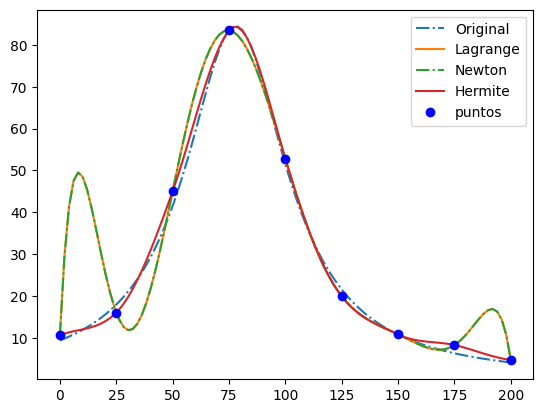

In [7]:
x = sp.Symbol('x')

Energia  = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

Er, T = 78, 55
σ0 = ((Energia[3]-Er)**2 + (T/2)**2) * sigma_exp[3]

f = lambda E: σ0 / ((E - Er)**2 + (T/2)**2)
df = lambda E:-2 * σ0 * (E - Er) / ((E - Er)**2 + (T/2)**2)**2

dSigma = df(Energia)

lagrange_P2 = lagrange(Energia, sigma_exp)
newton_P2 = sp.lambdify(x, inter_Newton(Energia, sigma_exp, x))
hermite_P2 = CHermite(Energia, sigma_exp, dSigma)

x = np.linspace(min(Energia), max(Energia), 100)
y = f(x)

y_lagrange_P2 = lagrange_P2(x)
y_newton_P2 = newton_P2(x)
y_hermite_P2 = hermite_P2(x)

error_max_lagrange_P2 = max(abs(y - y_lagrange_P2))
error_max_newton_P2 = max(abs(y - y_newton_P2))
error_max_hermite_P2 = max(abs(y - y_hermite_P2))

print(f'El error maximo con lagrange fue de: {error_max_lagrange_P2}\nCon newton fue de: {error_max_newton_P2}\nCon hermite fue de: {error_max_hermite_P2}')

plt.plot(x, y, linestyle= '-.', label= 'Original')
plt.plot(x, y_lagrange_P2, label= 'Lagrange')
plt.plot(x, y_newton_P2, '-.', label= 'Newton')
plt.plot(x, y_hermite_P2, label= 'Hermite')
plt.plot(Energia, sigma_exp, 'bo', label= 'puntos')

plt.legend()

# Problema 3. sympy

$$ f(x) = \frac {1}{1 + 25x^2}

La cuota de error para la interpolacion de lagrange en el punto 0.5 con 4 puntos fue de: -0.0


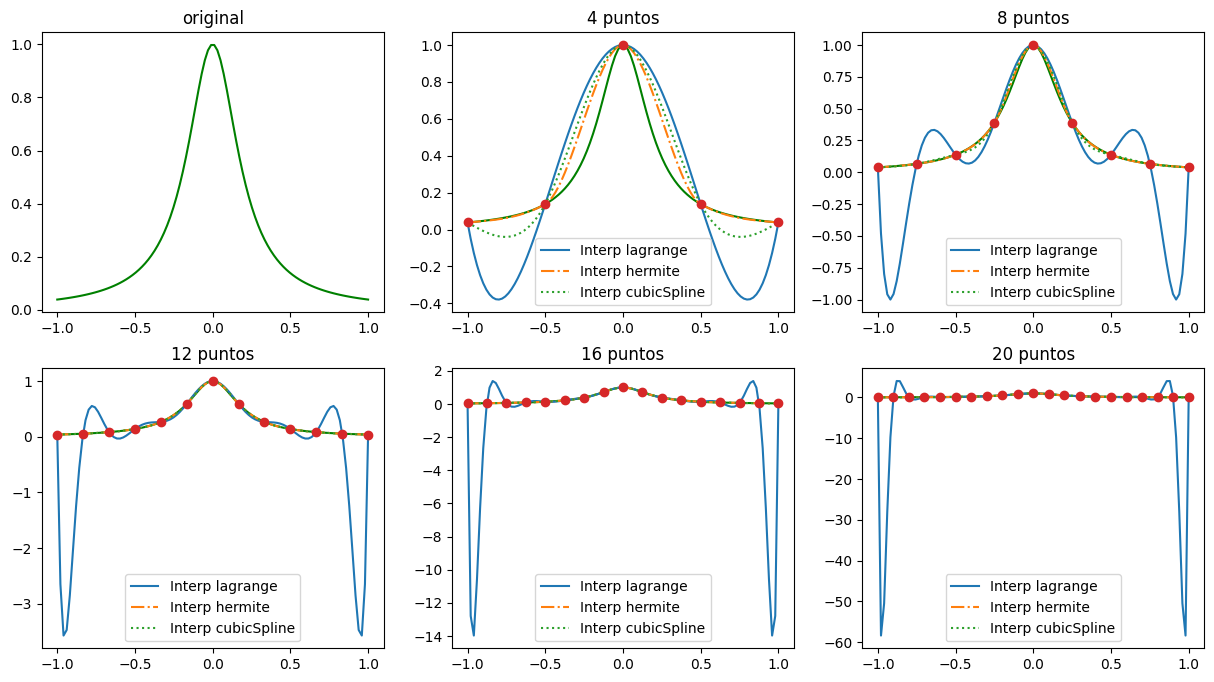

In [63]:
x_symbol = sp.Symbol('x')

f_symbol = 1/(1+25*x_symbol**2)
df_symbol = sp.diff(f_symbol, x_symbol)

f = sp.lambdify(x_symbol, f_symbol)
df = sp.lambdify(x_symbol, df_symbol)

def error_lagrange_general(xList, f_symbol, n, x = sp.Symbol('x')):

    dfn = sp.diff(f_symbol, x, n)
    error = 1/(factorial(n)) * dfn

    for xi in xList:
        error *= (x - xi)
    
    return error

n_values = [4, 8, 12, 16, 20]
x = np.linspace(-1, 1, 100)
y = f(x)

'''--------------------Grafica----------------------'''
fig, ax = plt.subplots(2, 3, figsize= (15, 8))

ax[0,0].plot(x, y, color= 'Green')
ax[0,0].set_title(f'original')

for n in range(len(n_values)):
    n_i = n_values[n]

    x_interp = np.linspace(-1, 1, n_i+1)
    y_interp_P3 = f(x_interp)
    dy_interp_P3 = df(x_interp)

    #Interpolaciones
    y_lagrange_P3 = lagrange(x_interp, y_interp_P3)(x)
    y_hermite_P3 = CHermite(x_interp, y_interp_P3, dy_interp_P3)(x)
    y_cubicSpline_P3 = CubicSpline(x_interp, y_interp_P3, bc_type= 'natural')(x)

    if n_i == 4:
        error = sp.lambdify(x_symbol, error_lagrange_general(x_interp, f_symbol, n_i))(0.5)
        print(f'La cuota de error para la interpolacion de lagrange en el punto 0.5 con 4 puntos fue de: {error}')

    if n < 2:
        ax[0, n+1].plot(x, y, color= 'Green')
        ax[0, n+1].plot(x, y_lagrange_P3, label= 'Interp lagrange')
        ax[0, n+1].plot(x, y_hermite_P3, '-.', label= 'Interp hermite')
        ax[0, n+1].plot(x, y_cubicSpline_P3, ':', label= 'Interp cubicSpline')
        ax[0, n+1].plot(x_interp, y_interp_P3, 'o')
        
        ax[0, n+1].set_title(f'{n_i} puntos')
        ax[0, n+1].legend()
    else:
        ax[1, n-2].plot(x, y, color= 'Green')
        ax[1, n-2].plot(x, y_lagrange_P3, label= 'Interp lagrange')
        ax[1, n-2].plot(x, y_hermite_P3, '-.', label= 'Interp hermite')
        ax[1, n-2].plot(x, y_cubicSpline_P3, ':',label= 'Interp cubicSpline')
        ax[1, n-2].plot(x_interp, y_interp_P3, 'o')
        
        ax[1, n-2].set_title(f'{n_i} puntos')
        ax[1, n-2].legend()


Se puede ver que, la interpolacion de lagrange es demasiado inexacta para graficar dicha funcion, mientras que las interpolaciones de hermite y cubic spline son mucho mejores, y su exactitud crece conforme crece la cantidad de puntos

# Problema 4. Paloma

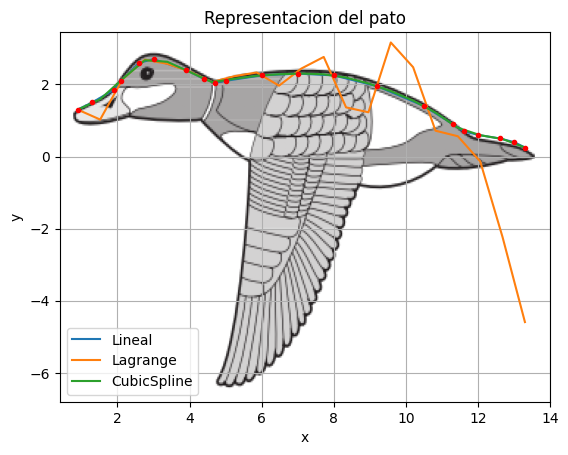

In [4]:

pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]


#Interpolacion de lagrange
lagrange_Pato = lagrange(xp, yp)
cubicSpline_Pato = CubicSpline(xp, yp, bc_type= 'natural')


#Graficas
x = np.linspace(min(xp), max(xp), 21)
y_Lagrange = (lagrange_Pato(x))
y_CubicSpline = (cubicSpline_Pato(x))

#Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()

plt.plot(xp, yp, label= 'Lineal')#Interpolacion lineal
plt.plot(x, y_Lagrange, label= 'Lagrange')#Interpolacion de lagrange
plt.plot(x, y_CubicSpline, label= 'CubicSpline')#Interpolacion por cubic spline

plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()


Se puede ver que la imterpolacion de lagrange presenta mas oscilaciones y mas abruptas, recordemos que este metodo es estable solo para pocos puntos a diferencia del cubicSpline